In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Import Dataset

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/1. Telco Customer Churn/Data/TelcoChurn_clean.csv")

In [4]:
pd.set_option("display.max_colwidth",None,"display.max_columns",None)

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Normlisasi dan Standarisasi

mari cek apakah kolom numerikal itu distribusi normal atau tidak

In [6]:
Numerikal = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

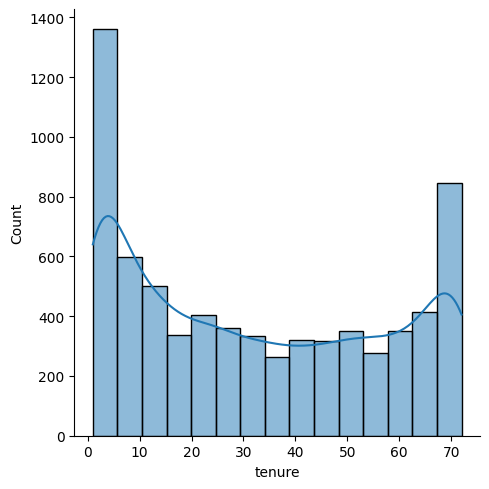

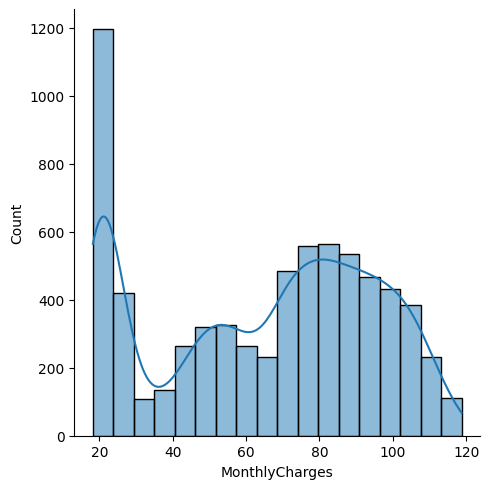

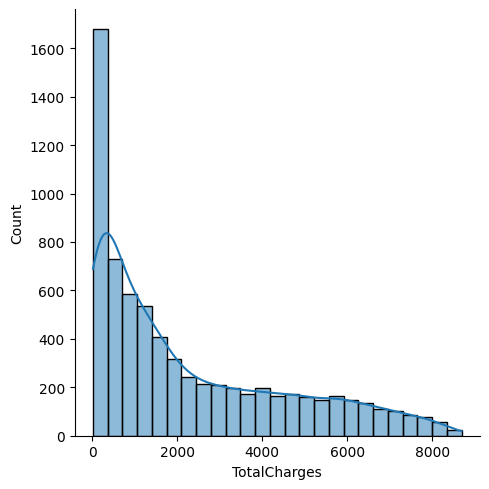

In [7]:
for i in Numerikal.columns:
  sns.displot(df, x=i, kde=True, height=5)
  plt.show()

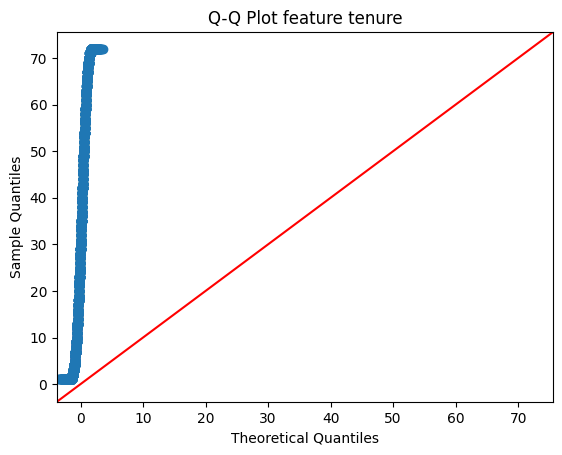

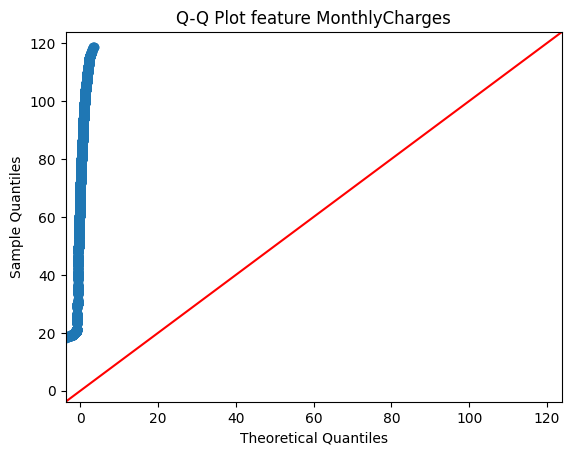

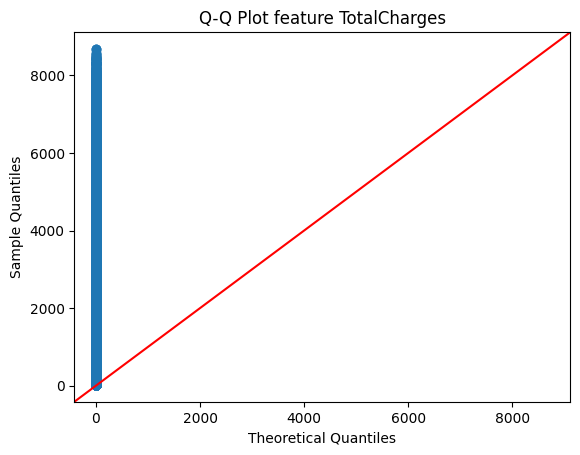

In [8]:
for i in Numerikal.columns:
  sm.qqplot(df[i], line ='45')
  plt.title(f"Q-Q Plot feature {i}")
  plt.show()

Karena bukan distribusi normal, maka kita akan lakukan Normalisasi

kita akan menggunakan Z-Score Normalization karena ini cocok untuk data yang distribusinya tidak diketahui

In [9]:
Numerikal.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [10]:
scaler = StandardScaler()
df["tenure"] = pd.DataFrame(scaler.fit_transform(df[["tenure"]]), columns=["tenure"])

In [11]:
df["MonthlyCharges"] = pd.DataFrame(scaler.fit_transform(df[["MonthlyCharges"]]), columns=["MonthlyCharges"])

In [12]:
df["TotalCharges"] = pd.DataFrame(scaler.fit_transform(df[["TotalCharges"]]), columns=["TotalCharges"])

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7.032000e+03,7.032000e+03,7.032000e+03
mean,0.162400,-1.126643e-16,6.062651e-17,-1.119064e-16
std,0.368844,1.000071e+00,1.000071e+00,1.000071e+00
min,0.000000,-1.280248e+00,-1.547283e+00,-9.990692e-01
25%,0.000000,-9.542963e-01,-9.709769e-01,-8.302488e-01
50%,0.000000,-1.394171e-01,1.845440e-01,-3.908151e-01
75%,0.000000,9.199259e-01,8.331482e-01,6.668271e-01
max,1.000000,1.612573e+00,1.793381e+00,2.824261e+00


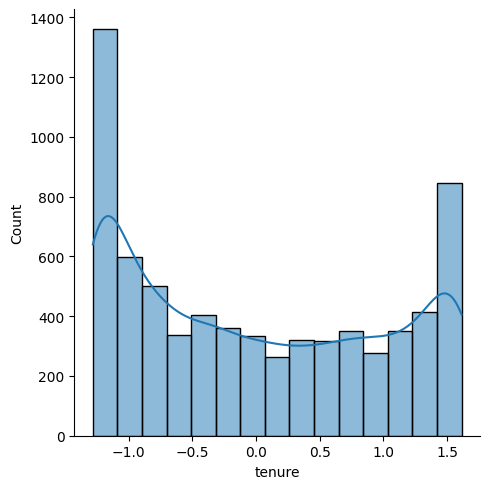

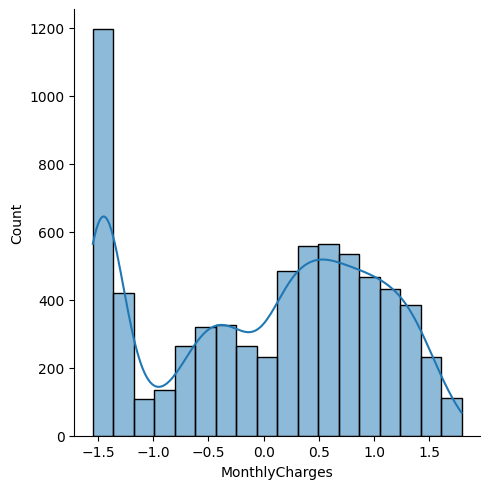

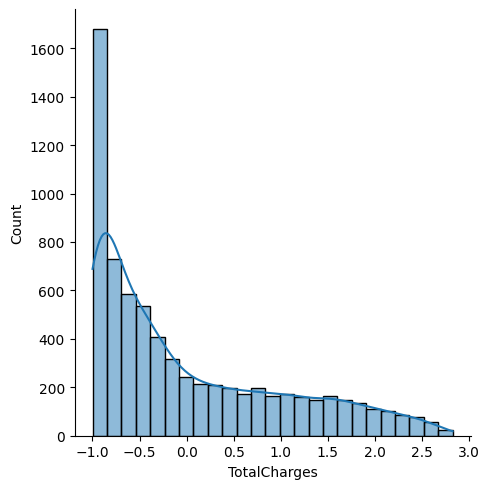

In [14]:
Numerikal = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

for i in Numerikal.columns:
  sns.displot(df, x=i, kde=True, height=5)
  plt.show()

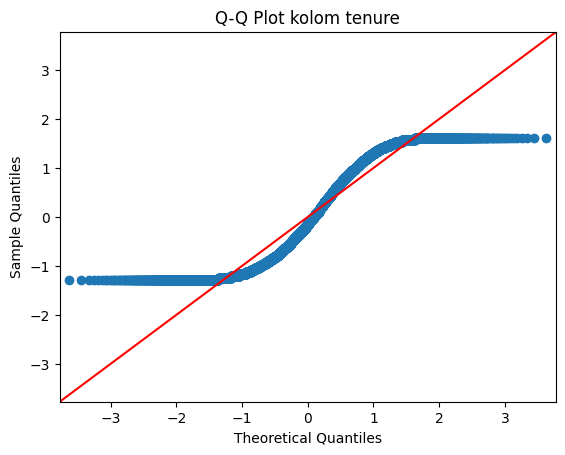

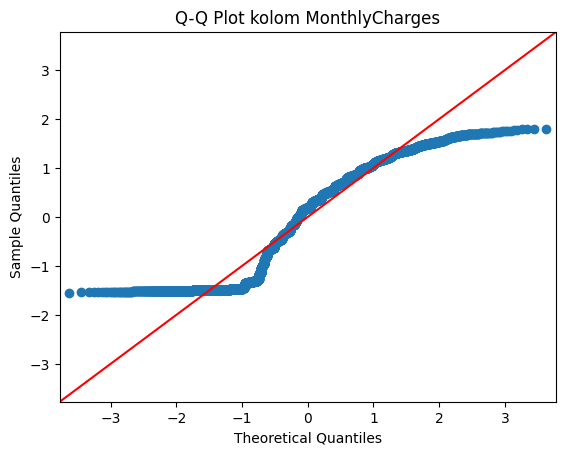

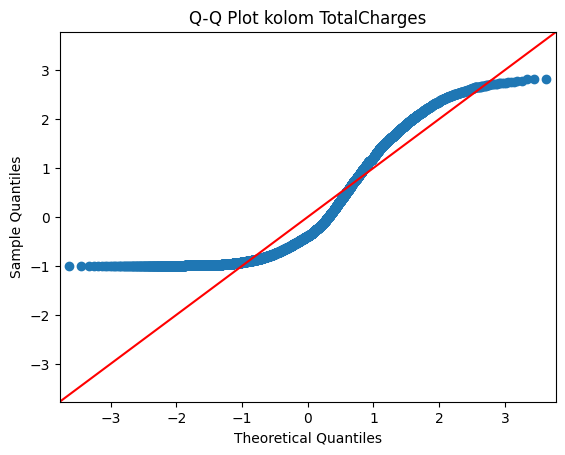

In [15]:
for i in Numerikal.columns:
  sm.qqplot(df[i], line ='45')
  plt.title(f"Q-Q Plot kolom {i}")
  plt.show()

berdasarkan qq plot..sudah distribusi normal

# Feature encoding

In [16]:
Kategorikal = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'Contract', 'PaperlessBilling', 'PaymentMethod']]

In [17]:
gender = pd.get_dummies(df["gender"])
gender = gender.astype(int)

In [18]:
gender

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
7027,0,1
7028,1,0
7029,1,0
7030,0,1


In [19]:
gender.rename(columns={"Male":"Gender Male",
                       "Female":"Gender Female"},inplace=True)

In [20]:
gender

,Gender Female,Gender Male
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
7027,0,1
7028,1,0
7029,1,0
7030,0,1


In [21]:
SeniorCitizen = pd.get_dummies(df["SeniorCitizen"])
SeniorCitizen = SeniorCitizen.astype(int)

In [22]:
SeniorCitizen

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7027,1,0
7028,1,0
7029,1,0
7030,0,1


In [23]:
SeniorCitizen.rename(columns={1:"Is SeniorCitizen",
                              0:"Not a SeniorCitizen"},inplace=True)

In [24]:
SeniorCitizen

,Not a SeniorCitizen,Is SeniorCitizen
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7027,1,0
7028,1,0
7029,1,0
7030,0,1


In [25]:
Partner = pd.get_dummies(df["Partner"])
Partner = Partner.astype(int)

In [26]:
Partner

,No,Yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7027,0,1
7028,0,1
7029,0,1
7030,0,1


In [27]:
Partner.rename(columns={"Yes":"Have Partner",
                        "No":"Not Have Partner"},inplace=True)

In [28]:
Partner

,Not Have Partner,Have Partner
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7027,0,1
7028,0,1
7029,0,1
7030,0,1


In [29]:
Dependents = pd.get_dummies(df["Dependents"])
Dependents = Dependents.astype(int)

In [30]:
Dependents

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7027,0,1
7028,0,1
7029,0,1
7030,1,0


In [31]:
Dependents.rename(columns={"Yes":"Have Dependents",
                           "No":"Not Have Dependets"},inplace=True)

In [32]:
Dependents

,Not Have Dependets,Have Dependents
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
7027,0,1
7028,0,1
7029,0,1
7030,1,0


In [33]:
PhoneService = pd.get_dummies(df["PhoneService"])
PhoneService = PhoneService.astype(int)

In [34]:
PhoneService

,No,Yes
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
7027,0,1
7028,0,1
7029,1,0
7030,0,1


In [35]:
PhoneService.rename(columns={"Yes":"Have PhoneService",
                             "No":"Not Have PhoneService"},inplace=True)

In [36]:
PhoneService

,Not Have PhoneService,Have PhoneService
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
7027,0,1
7028,0,1
7029,1,0
7030,0,1


In [37]:
MultipleLines = pd.get_dummies(df["MultipleLines"])
MultipleLines = MultipleLines.astype(int)

In [38]:
MultipleLines

,No,No phone service,Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7027,0,0,1
7028,0,0,1
7029,0,1,0
7030,0,0,1


In [39]:
MultipleLines.rename(columns={"Yes":"Have MultipleLines",
                             "No":"Not Have MultipleLines",
                              "No phone service":"Not have phone service"},inplace=True)

In [40]:
MultipleLines

,Not Have MultipleLines,Not have phone service,Have MultipleLines
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7027,0,0,1
7028,0,0,1
7029,0,1,0
7030,0,0,1


In [41]:
InternetService = pd.get_dummies(df["InternetService"])
InternetService = InternetService.astype(int)

In [42]:
InternetService

,DSL,Fiber optic,No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
7027,1,0,0
7028,0,1,0
7029,1,0,0
7030,0,1,0


In [43]:
InternetService.rename(columns={"Fiber optic":"Using Fiber optic as InternetService",
                               "DSL":"Using DSL as InternetService",
                                "No":"Not have InternetService"},inplace=True)

In [44]:
InternetService

,Using DSL as InternetService,Using Fiber optic as InternetService,Not have InternetService
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
7027,1,0,0
7028,0,1,0
7029,1,0,0
7030,0,1,0


In [45]:
OnlineSecurity = pd.get_dummies(df["OnlineSecurity"])
OnlineSecurity = OnlineSecurity.astype(int)

In [46]:
OnlineSecurity

,No,No internet service,Yes
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
7027,0,0,1
7028,1,0,0
7029,0,0,1
7030,1,0,0


In [47]:
OnlineSecurity.rename(columns={"Yes":"Have OnlineSecurity",
                               "No":"Not Have OnlineSecurity",
                               "No internet service":"Not have internet service(OnlineSecurity)"},inplace=True)

In [48]:
OnlineSecurity

,Not Have OnlineSecurity,Not have internet service(OnlineSecurity),Have OnlineSecurity
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
7027,0,0,1
7028,1,0,0
7029,0,0,1
7030,1,0,0


In [49]:
OnlineBackup = pd.get_dummies(df["OnlineBackup"])
OnlineBackup = OnlineBackup.astype(int)

In [50]:
OnlineBackup

,No,No internet service,Yes
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
7027,1,0,0
7028,0,0,1
7029,1,0,0
7030,1,0,0


In [51]:
OnlineBackup.rename(columns={"No":"Not Have OnlineBackup",
                            "Yes":"Have OnlineBackup",
                             "No internet service":"Not have internet service(OnlineBackup)"},inplace=True)
OnlineBackup

,Not Have OnlineBackup,Not have internet service(OnlineBackup),Have OnlineBackup
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
7027,1,0,0
7028,0,0,1
7029,1,0,0
7030,1,0,0


In [52]:
DeviceProtection = pd.get_dummies(df["DeviceProtection"])
DeviceProtection = DeviceProtection.astype(int)

In [53]:
DeviceProtection

,No,No internet service,Yes
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
7027,0,0,1
7028,0,0,1
7029,1,0,0
7030,1,0,0


In [54]:
DeviceProtection.rename(columns={"No":"Not Have DeviceProtection",
                                "Yes":"Have DeviceProtection",
                                 "No internet service":"Not Have internet service(DeviceProtection)"},inplace=True)
DeviceProtection

,Not Have DeviceProtection,Not Have internet service(DeviceProtection),Have DeviceProtection
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
7027,0,0,1
7028,0,0,1
7029,1,0,0
7030,1,0,0


In [55]:
TechSupport = pd.get_dummies(df["TechSupport"])
TechSupport = TechSupport.astype(int)

In [56]:
TechSupport

,No,No internet service,Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
7027,0,0,1
7028,1,0,0
7029,1,0,0
7030,1,0,0


In [57]:
TechSupport.rename(columns={"No":"Not have TechSupport",
                           "Yes":"Have TechSupport",
                            "No internet service":"Not Have internet service(TechSupport)"},inplace=True)
TechSupport

,Not have TechSupport,Not Have internet service(TechSupport),Have TechSupport
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
7027,0,0,1
7028,1,0,0
7029,1,0,0
7030,1,0,0


In [58]:
StreamingTV = pd.get_dummies(df["StreamingTV"])
StreamingTV = StreamingTV.astype(int)

In [59]:
StreamingTV

,No,No internet service,Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
7027,0,0,1
7028,0,0,1
7029,1,0,0
7030,1,0,0


In [60]:
StreamingTV.rename(columns={"No":"Not have StreamingTV",
                           "Yes":"Have StreamingTV",
                            "No internet service":"Not Have internet service(StreamingTV)"},inplace=True)
StreamingTV

,Not have StreamingTV,Not Have internet service(StreamingTV),Have StreamingTV
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
7027,0,0,1
7028,0,0,1
7029,1,0,0
7030,1,0,0


In [61]:
StreamingMovies = pd.get_dummies(df["StreamingMovies"])
StreamingMovies = StreamingMovies.astype(int)
StreamingMovies

,No,No internet service,Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
7027,0,0,1
7028,0,0,1
7029,1,0,0
7030,1,0,0


In [62]:
StreamingMovies.rename(columns={"No":"Not have StreamingMovies",
                           "Yes":"Have StreamingMovies",
                                "No internet service":"Not Have internet service(StreamingMovies)"},inplace=True)
StreamingMovies

,Not have StreamingMovies,Not Have internet service(StreamingMovies),Have StreamingMovies
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
7027,0,0,1
7028,0,0,1
7029,1,0,0
7030,1,0,0


In [63]:
Contract = pd.get_dummies(df["Contract"])
Contract = Contract.astype(int)
Contract

,Month-to-month,One year,Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7027,0,1,0
7028,0,1,0
7029,1,0,0
7030,1,0,0


In [64]:
PaperlessBilling = pd.get_dummies(df["PaperlessBilling"])
PaperlessBilling = PaperlessBilling.astype(int)
PaperlessBilling

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
7027,0,1
7028,0,1
7029,0,1
7030,0,1


In [65]:
PaperlessBilling.rename(columns={"Yes":"Using PaperlessBilling",
                                 "No":"Not Using PaperlessBilling"},inplace=True)
PaperlessBilling

,Not Using PaperlessBilling,Using PaperlessBilling
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
7027,0,1
7028,0,1
7029,0,1
7030,0,1


In [66]:
PaymentMethod = pd.get_dummies(df["PaymentMethod"])
PaymentMethod = PaymentMethod.astype(int)
PaymentMethod

,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
7027,0,0,0,1
7028,0,1,0,0
7029,0,0,1,0
7030,0,0,0,1


In [67]:
df = pd.concat([df,gender, SeniorCitizen, Partner, Dependents, PhoneService,
       MultipleLines, InternetService, OnlineSecurity, OnlineBackup,
       DeviceProtection, TechSupport, StreamingTV, StreamingMovies,
       Contract, PaperlessBilling, PaymentMethod],axis=1)

In [68]:
df.drop(columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 48 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   customerID                                   7032 non-null   object 
 1   tenure                                       7032 non-null   float64
 2   MonthlyCharges                               7032 non-null   float64
 3   TotalCharges                                 7032 non-null   float64
 4   Churn                                        7032 non-null   object 
 5   Gender Female                                7032 non-null   int64  
 6   Gender Male                                  7032 non-null   int64  
 7   Not a SeniorCitizen                          7032 non-null   int64  
 8   Is SeniorCitizen                             7032 non-null   int64  
 9   Not Have Partner                             7032 non-null   int64  
 10  

# Export dataset

In [70]:
import os
df.to_csv("TelcoChurn_prep.csv", index=False)
print(os.listdir('.'))

['.config', 'TelcoChurn_prep.csv', 'drive', 'sample_data']
